<a href="https://colab.research.google.com/github/andrePratama1512/andrePratama1512.github.io/blob/main/UTSPEramalanTod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import datetime

Menggabungkan 12 file csv menjadi 1 file csv

In [ ]:
directory = '/content/Sales_Data'
dataframes = []

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)

sales = pd.concat(dataframes, ignore_index=True)
sales.to_csv('sales.csv', index=False)


In [ ]:
df = pd.read_csv("sales.csv")

df = df.drop_duplicates()
df = df.dropna(how="any")
#menghapus header setelah digabungkan
df['Month'] = df["Order Date"].str[0:2]
df = df[df["Order Date"].str[0:2] != 'Or']

df.info()
df.head()

<ipython-input-11-9b99899ce98b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df["Order Date"].str[0:2]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185686 non-null  object
 1   Product           185686 non-null  object
 2   Quantity Ordered  185686 non-null  object
 3   Price Each        185686 non-null  object
 4   Order Date        185686 non-null  object
 5   Purchase Address  185686 non-null  object
 6   Month             185686 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",06
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",06
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",06
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",06
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",06


In [ ]:
df["Quantity Ordered"] = df["Quantity Ordered"].astype(int)
df["Price Each"] = df["Price Each"].astype(float)
df["Order Date"] = pd.to_datetime(df["Order Date"])

df.dtypes

ValueError: ignored

TASK 1

Koefisien Regresi: 2.252723258586537
Intercept: 16.35414218907522


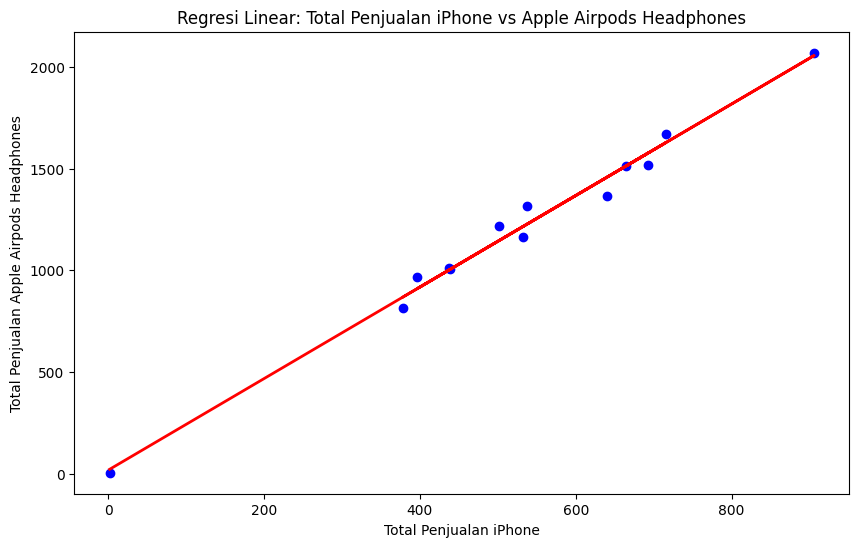

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Kelompokkan data per bulan dan produk, dan hitung total penjualan
monthly_summary = df.groupby([df['Order Date'].dt.to_period('M'), 'Product'])['Quantity Ordered'].sum().reset_index()

# Pivot data untuk mendapatkan total penjualan produk per bulan
pivoted_data = monthly_summary.pivot(index='Order Date', columns='Product', values='Quantity Ordered').fillna(0)

# Membuat model regresi linear
model = LinearRegression()

# Variabel independen adalah total penjualan iPhone
X = pivoted_data[['iPhone']]

# Variabel dependen adalah total penjualan Apple Airpods Headphones
y = pivoted_data['Apple Airpods Headphones']

# Latih model regresi linear
model.fit(X, y)

# Mencetak koefisien regresi dan intercept
print("Koefisien Regresi:", model.coef_[0])
print("Intercept:", model.intercept_)

# Visualisasi hasil regresi linear
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('Regresi Linear: Total Penjualan iPhone vs Apple Airpods Headphones')
plt.xlabel('Total Penjualan iPhone')
plt.ylabel('Total Penjualan Apple Airpods Headphones')
plt.show()

TASK 2

TypeError: ignored

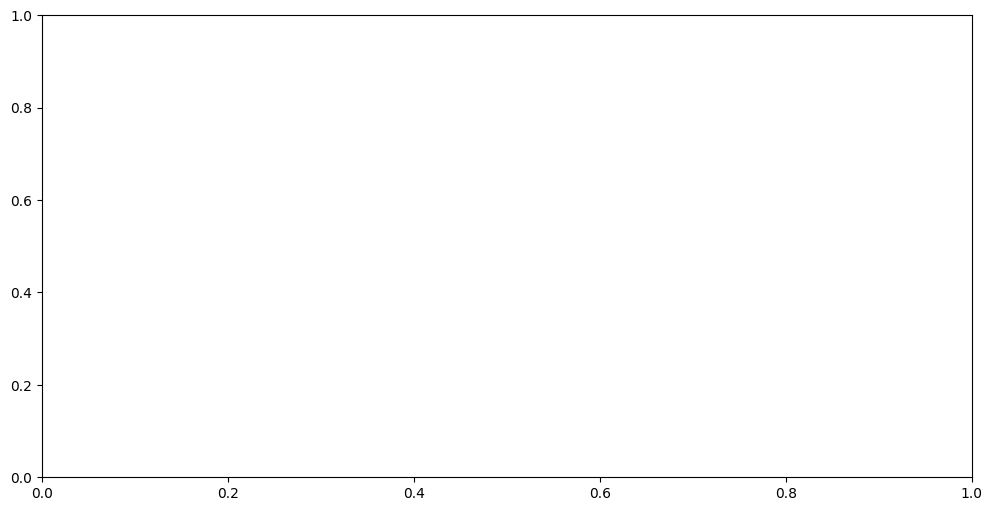

In [ ]:
# Kelompokkan data per minggu dan produk, dan hitung total penjualan per minggu
weekly_summary = df.groupby([df['Order Date'].dt.to_period('W'), 'Product'])['Quantity Ordered'].sum().reset_index()

# Pivot data untuk mendapatkan total penjualan produk per minggu
pivoted_data = weekly_summary.pivot(index='Order Date', columns='Product', values='Quantity Ordered').fillna(0)

# Menghitung moving average dengan jendela lebar 4 minggu
moving_average = pivoted_data.rolling(window=4).mean()
# Visualisasi data moving average
plt.figure(figsize=(12, 6))

for product in pivoted_data.columns:
    plt.plot(moving_average.index, moving_average[product], label=product)

plt.title('Moving Average Penjualan Produk per Minggu')
plt.xlabel('Minggu')
plt.ylabel('Moving Average Penjualan')
plt.legend()
plt.grid(True)

plt.show()

<ipython-input-35-78138bd59d57>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iphone_data["Order Date"] = pd.to_datetime(iphone_data["Order Date"])
<ipython-input-35-78138bd59d57>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = iphone_data.groupby(iphone_data['Order Date'].dt.to_period('M')).sum()['Quantity Ordered']


TypeError: ignored

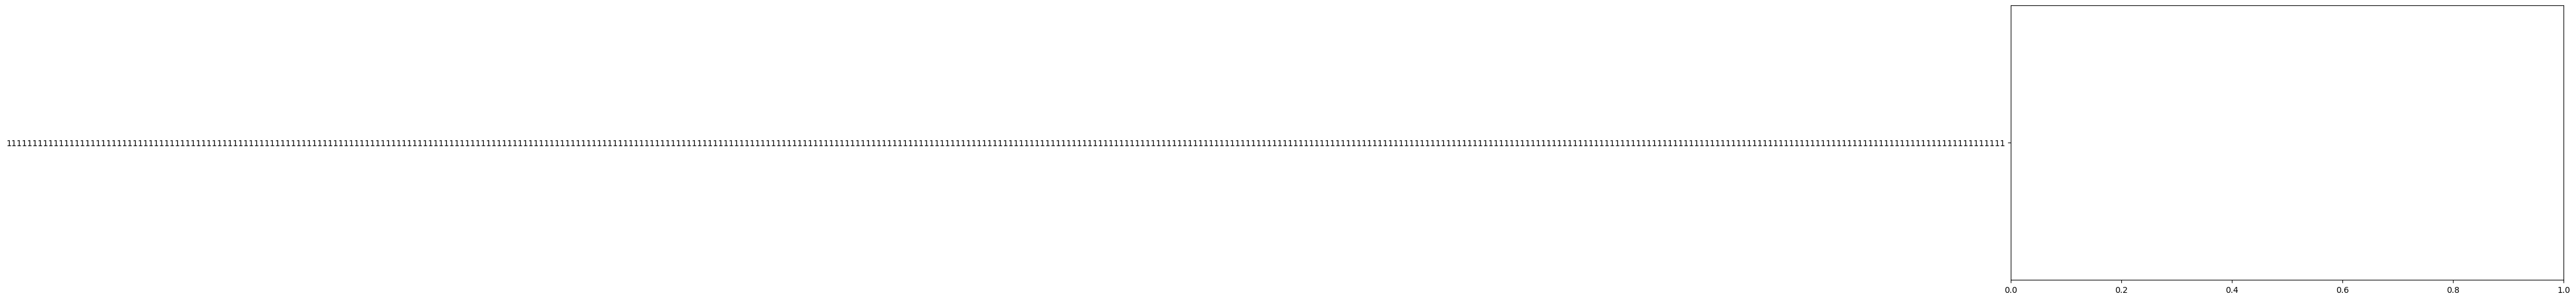

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

iphone_data = df[df['Product'] == 'iPhone']
iphone_data["Order Date"] = pd.to_datetime(iphone_data["Order Date"])
monthly_data = iphone_data.groupby(iphone_data['Order Date'].dt.to_period('M')).sum()['Quantity Ordered']

# Plot data penjualan iPhone per bulan
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data.values)
plt.title('Data Penjualan iPhone per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.show()

# Model ARIMA
model = ARIMA(monthly_data, order=(5,1,0))
model_fit = model.fit()

# Membuat tanggal untuk 7 hari, 1 minggu, dan 1 bulan ke depan
current_month = monthly_data.index[-1].to_timestamp()
forecast_7_days = model_fit.forecast(steps=7)
forecast_1_week = model_fit.forecast(steps=7)  # Ganti dengan 7 jika Anda ingin prediksi 1 minggu
forecast_1_month = model_fit.forecast(steps=30)  # Ganti dengan 30 jika Anda ingin prediksi 1 bulan

# Menampilkan hasil prediksi
print(f"Prediksi penjualan iPhone untuk 7 hari ke depan: {forecast_7_days}")
print(f"Prediksi penjualan iPhone untuk 1 minggu ke depan: {forecast_1_week}")
print(f"Prediksi penjualan iPhone untuk 1 bulan ke depan: {forecast_1_month}")